In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

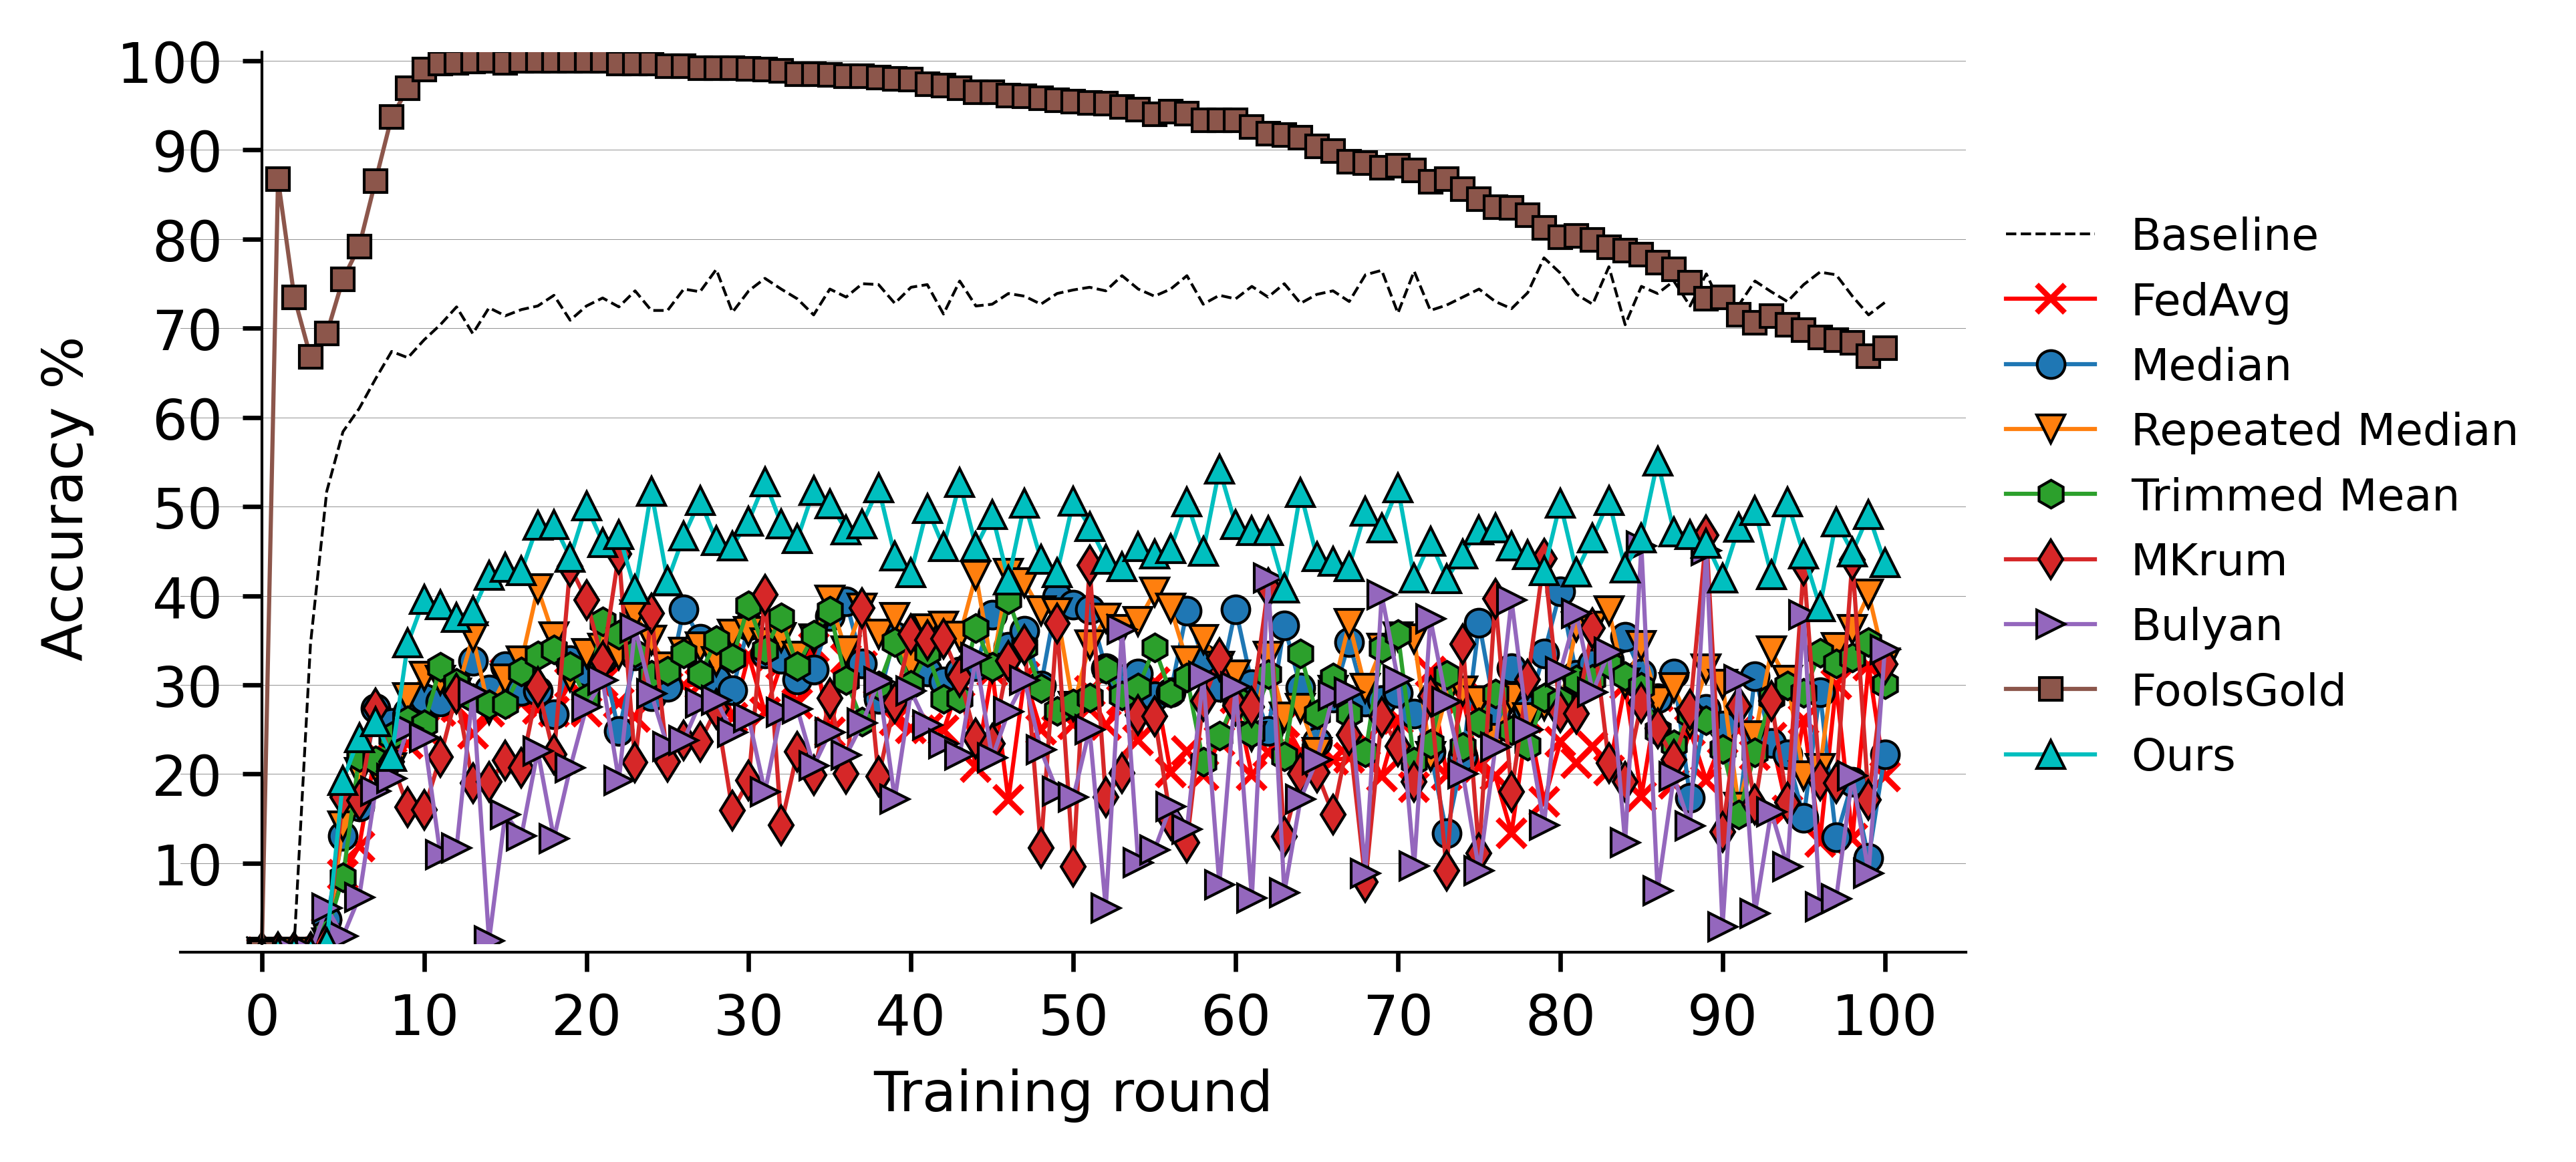

In [10]:
#MNIST under Label-flipping, from 7 to 1
x = [i for i in range(0, 101, 1)]


fig, ax = plt.subplots(figsize=(6.5, 3), dpi= 600, facecolor='w', edgecolor='k')


baseline = np.array([0, 0.0, 1.0, 34.6, 51.7, 58.4, 61.0, 64.3, 67.4, 66.7, 68.7, 70.4, 72.4, 69.4, 72.3, 71.4, 
                     72.1, 72.5, 73.7, 70.9, 72.5, 73.4, 72.4, 74.2, 72.0, 72.0, 74.4, 74.1, 76.6, 71.8, 74.2, 
                     75.6, 74.4, 73.3, 71.5, 74.4, 73.5, 75.0, 74.9, 72.8, 74.6, 74.9, 71.6, 75.3, 72.5, 72.7, 
                     73.9, 73.6, 72.7, 73.9, 74.3, 74.6, 74.2, 75.9, 74.4, 73.6, 74.4, 75.9, 72.7, 73.7, 73.3, 
                     74.7, 73.5, 75.0, 72.8, 73.8, 74.2, 73.0, 76.0, 76.5, 71.7, 76.4, 72.0, 72.6, 73.5, 74.4, 
                     73.0, 72.2, 74.0, 77.9, 76.2, 73.8, 72.7, 76.9, 70.4, 74.7, 73.9, 75.3, 72.5, 76.1, 72.3, 
                     72.6, 75.3, 74.1, 73.0, 74.9, 76.3, 76.0, 73.6, 71.5, 72.9, 74.4])

fedavg = np.array([0, 0.0, 0.0, 0.0, 2.3, 8.7, 11.9, 22.4, 24.0, 23.4, 24.9, 27.1, 27.5, 
                   24.5, 27.0, 31.3, 28.0, 27.3, 27.0, 30.2, 27.0, 30.3, 28.0, 26.4, 30.8, 
                   32.5, 29.9, 30.1, 32.3, 26.3, 33.3, 26.9, 32.3, 27.9, 34.2, 24.7, 32.9, 
                   32.1, 27.8, 26.0, 25.1, 25.1, 24.9, 30.3, 20.8, 31.5, 17.1, 30.9, 25.0, 
                   27.6, 25.6, 29.3, 25.5, 28.3, 23.8, 30.3, 20.2, 22.6, 19.9, 23.7, 28.5, 
                   19.9, 22.4, 25.8, 22.5, 22.4, 21.6, 21.8, 23.7, 19.7, 26.2, 18.5, 31.5, 
                   19.9, 28.4, 20.8, 19.8, 13.4, 26.3, 16.9, 23.6, 21.2, 23.1, 20.4, 30.0, 
                   17.5, 28.7, 18.9, 24.9, 19.3, 23.9, 25.0, 22.1, 24.1, 15.9, 26.1, 12.4, 
                   30.1, 12.8, 32.2, 19.7, 21.6])

median = np.array([0, 0.0, 0.0, 0.0, 3.7, 13.1, 16.4, 27.4, 25.7, 26.9, 28.5, 28.1, 29.7, 32.7, 
                   29.5, 32.1, 29.3, 29.3, 26.7, 32.8, 31.5, 32.9, 24.8, 33.3, 28.7, 29.8, 38.5, 
                   35.2, 30.5, 29.4, 36.7, 33.5, 32.9, 30.6, 31.7, 37.7, 39.4, 32.4, 28.4, 35.5, 
                   33.5, 31.5, 30.4, 31.5, 32.1, 37.9, 34.3, 36.1, 29.9, 39.9, 39.0, 38.5, 31.9, 
                   30.7, 31.3, 28.7, 29.2, 38.3, 32.9, 29.8, 38.5, 30.1, 24.8, 36.7, 29.7, 23.6, 
                   28.6, 34.8, 28.1, 28.3, 29.1, 26.8, 22.5, 13.4, 22.0, 37.0, 26.9, 31.9, 27.2, 
                   33.5, 40.5, 31.1, 32.4, 32.8, 35.4, 31.3, 28.5, 31.3, 17.3, 27.3, 25.4, 15.7, 
                   31.0, 23.5, 22.2, 15.1, 29.2, 12.9, 19.1, 10.6, 22.2, 21.5])

rmedian = np.array([0, 0.0, 0.0, 0.0, 1.1, 14.2, 20.2, 20.8, 20.7, 28.6, 31.0, 30.5, 29.1, 35.4, 
                    27.2, 30.7, 32.7, 40.8, 35.4, 30.9, 33.5, 34.1, 33.4, 37.9, 35.0, 32.0, 33.7, 
                    34.3, 32.6, 35.7, 36.0, 34.7, 35.3, 33.2, 35.2, 39.5, 33.8, 38.6, 35.7, 37.6, 
                    32.3, 36.3, 36.6, 35.5, 42.3, 31.9, 42.5, 41.5, 38.3, 38.1, 27.6, 34.5, 37.5, 
                    36.2, 37.1, 40.4, 38.6, 32.7, 35.1, 32.1, 31.1, 24.2, 33.2, 26.4, 27.4, 22.4, 
                    29.4, 36.9, 29.6, 34.1, 35.4, 35.2, 22.0, 29.0, 29.3, 28.2, 24.0, 28.6, 26.3, 
                    27.7, 27.4, 36.5, 36.6, 38.3, 30.2, 34.4, 28.2, 29.7, 25.7, 31.8, 30.1, 16.3, 
                    24.3, 33.8, 30.5, 19.8, 20.6, 34.2, 36.2, 40.2, 32.5, 30.1])

tmean = np.array([0, 0.0, 0.0, 0.0, 2.3, 8.4, 21.9, 21.5, 24.2, 26.0, 25.6, 32.0, 
                  30.2, 28.5, 27.8, 27.8, 31.5, 33.3, 34.0, 32.1, 28.5, 37.1, 35.6, 
                  33.6, 31.1, 31.6, 33.5, 31.2, 35.0, 33.0, 38.9, 33.9, 37.6, 32.1, 35.6, 
                  38.3, 30.5, 25.9, 29.9, 34.8, 30.0, 33.7, 28.4, 28.5, 36.4, 32.0, 39.6, 
                  34.3, 29.6, 27.1, 27.9, 28.6, 31.8, 28.8, 29.7, 34.2, 29.1, 30.8, 21.4, 
                  24.3, 28.4, 24.6, 31.2, 22.0, 33.5, 26.7, 30.8, 26.8, 22.4, 34.1, 35.7, 
                  21.4, 23.4, 31.1, 23.0, 25.8, 29.0, 24.9, 23.2, 28.6, 28.2, 30.6, 30.7, 
                  32.3, 31.0, 29.8, 24.8, 23.3, 26.7, 26.0, 22.8, 15.5, 22.4, 28.6, 29.9, 
                  29.1, 33.6, 32.4, 33.1, 34.8, 30.1, 29.3])

mkrum = np.array([0, 0.0, 0.0, 0.0, 1.1, 17.4, 17.0, 27.4, 21.4, 16.3, 16.0, 21.9, 29.0, 
                  19.0, 19.1, 21.5, 20.7, 29.8, 22.2, 43.3, 39.5, 32.6, 44.7, 21.3, 38.0, 
                  21.4, 23.8, 23.6, 27.3, 15.9, 19.3, 40.1, 14.3, 22.5, 19.9, 28.5, 20.0, 
                  38.6, 19.7, 28.0, 35.7, 35.0, 35.2, 30.9, 24.0, 23.4, 32.7, 34.5, 11.7, 
                  36.9, 9.6, 43.4, 17.4, 20.1, 26.6, 26.5, 14.9, 12.3, 28.2, 33.0, 27.7, 
                  27.5, 40.9, 13.0, 20.0, 20.2, 15.5, 24.4, 7.9, 26.4, 23.1, 19.1, 28.7, 
                  9.2, 34.6, 11.1, 39.7, 18.0, 30.6, 44.2, 26.9, 26.8, 36.4, 21.2, 19.1, 
                  28.0, 25.1, 21.6, 27.2, 46.8, 13.5, 27.6, 16.6, 28.2, 16.8, 43.4, 19.3, 
                  19.0, 44.0, 17.1, 32.3, 26.9])

bulyan = np.array([0, 0.0, 0.0, 0.0, 5.0, 1.8, 6.2, 18.1, 19.5, 25.1, 24.1, 11.0, 11.7, 29.2, 
                   1.3, 15.5, 13.1, 22.6, 12.8, 20.7, 27.5, 30.5, 19.3, 36.4, 29.0, 23.1, 23.8, 
                   28.0, 28.3, 24.7, 26.3, 18.0, 26.9, 27.3, 20.9, 24.7, 22.1, 25.7, 30.4, 17.2, 
                   29.3, 25.5, 23.4, 22.1, 33.1, 21.8, 27.0, 30.5, 22.7, 18.1, 17.4, 25.0, 5.0, 
                   36.2, 10.1, 11.5, 16.4, 13.8, 31.0, 7.6, 29.8, 6.1, 42.0, 6.7, 17.2, 21.6, 
                   28.8, 29.2, 8.9, 40.1, 30.6, 9.7, 37.4, 28.1, 20.0, 9.2, 23.0, 39.5, 25.0, 
                   14.3, 31.5, 38.0, 29.2, 33.7, 12.3, 45.6, 6.9, 19.7, 14.2, 45.1, 2.9, 30.6, 
                   4.4, 15.8, 9.6, 37.9, 5.1, 6.0, 19.8, 8.9, 34.0, 15.3])

fg = np.array([0, 86.7, 73.5, 66.8, 69.4, 75.5, 79.2, 86.5, 93.7, 96.9, 99.0, 99.7, 99.8, 99.9, 
               100.0, 99.8, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.7, 99.7, 99.7, 99.4, 99.4, 
               99.2, 99.2, 99.2, 99.1, 99.0, 98.9, 98.5, 98.5, 98.4, 98.3, 98.3, 98.1, 98.0, 97.9, 
               97.4, 97.2, 96.9, 96.5, 96.5, 96.1, 96.0, 95.8, 95.6, 95.4, 95.3, 95.2, 94.8, 94.5, 
               94.0, 94.3, 94.1, 93.3, 93.3, 93.3, 92.6, 91.8, 91.7, 91.4, 90.4, 89.9, 88.7, 88.5, 
               88.0, 88.2, 87.7, 86.4, 86.7, 85.6, 84.5, 83.6, 83.5, 82.7, 81.3, 80.2, 80.4, 79.9, 
               79.1, 78.7, 78.3, 77.4, 76.6, 75.1, 73.3, 73.5, 71.5, 70.6, 71.4, 70.4, 69.8, 69.0, 
               68.7, 68.4, 66.9, 67.8, 67.8])

ours = np.array([0, 0.0, 0.0, 0.0, 1.1, 19.3, 24.1, 25.9, 22.0, 34.7, 39.6, 39.0, 37.6, 38.3, 
                 42.3, 43.2, 42.8, 47.9, 48.0, 44.3, 50.1, 46.0, 46.9, 40.7, 51.7, 41.7, 46.7, 
                 50.7, 46.2, 45.6, 48.4, 52.8, 48.1, 46.4, 51.8, 50.3, 47.4, 48.1, 52.1, 44.5, 
                 42.6, 49.8, 45.5, 52.7, 45.5, 49.1, 41.8, 50.4, 44.1, 42.6, 50.6, 47.8, 44.1, 
                 43.3, 45.5, 44.7, 45.3, 50.5, 45.0, 54.2, 48.0, 47.3, 47.3, 40.9, 51.6, 44.4, 
                 43.9, 43.3, 49.5, 47.6, 52.1, 42.0, 46.1, 41.9, 44.7, 47.4, 47.6, 45.6, 44.6, 
                 42.8, 50.4, 42.7, 46.5, 50.7, 43.1, 46.5, 55.1, 47.2, 46.9, 45.9, 42.0, 47.7, 
                 49.6, 42.4, 50.5, 44.7, 38.8, 48.3, 44.9, 49.1, 43.7, 45.5])

idx = np.array([i for i in range(0, 101, 1)])

ax.plot(x, baseline[idx], linewidth=0.5, label='Baseline' ,  
      linestyle='--',  color = 'black')

ax.plot(x, fedavg[idx], linewidth=0.75, label='FedAvg' ,  
        marker = 'x', markersize=5, color = 'r')

ax.plot(x, median[idx], linewidth=0.75, label='Median' , 
        markersize=5, marker = 'o', markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, rmedian[idx], linewidth=0.75, label='Repeated Median' , 
        markersize=5, marker = 'v', markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, tmean[idx], linewidth=0.75, label='Trimmed Mean' , 
        marker = 'h', markersize=5,  markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, mkrum[idx], linewidth=0.75, label='MKrum' , 
        marker = 'd', markersize=5,  markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, bulyan[idx], linewidth=0.75, label='Bulyan' , 
        marker = '>', markersize=5,  markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, fg[idx], linewidth=0.75, label='FoolsGold' , 
        marker = 's', markersize=4,  markeredgecolor='black', markeredgewidth=0.5)

ax.plot(x, ours[idx], linewidth=0.75, label='Ours' , 
        marker = '^', markersize=5,  markeredgecolor='black', markeredgewidth=0.5, color = 'c')


plt.xlabel("Training round", size = 10)
plt.ylabel("Accuracy %", size = 10)
# plt.title("Global accuracy evoloution under Gaussian noise attacks", size = 6)
plt.xticks(np.arange(0, 101, step=10), size = 8)
plt.yticks(np.arange(0, 101, step=10), size = 8)
plt.ylim(1, 101)
# ax.grid(True)
legend = ax.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
legend.get_frame().set_edgecolor('1.0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.grid(color='gray', linestyle='-', linewidth=0.1, axis = 'y')
plt.tight_layout()
plt.savefig('figures/cifar10_6LF.png', dpi = 600)
plt.show()